In [1]:
import numpy as np
import matplotlib.pyplot as plt

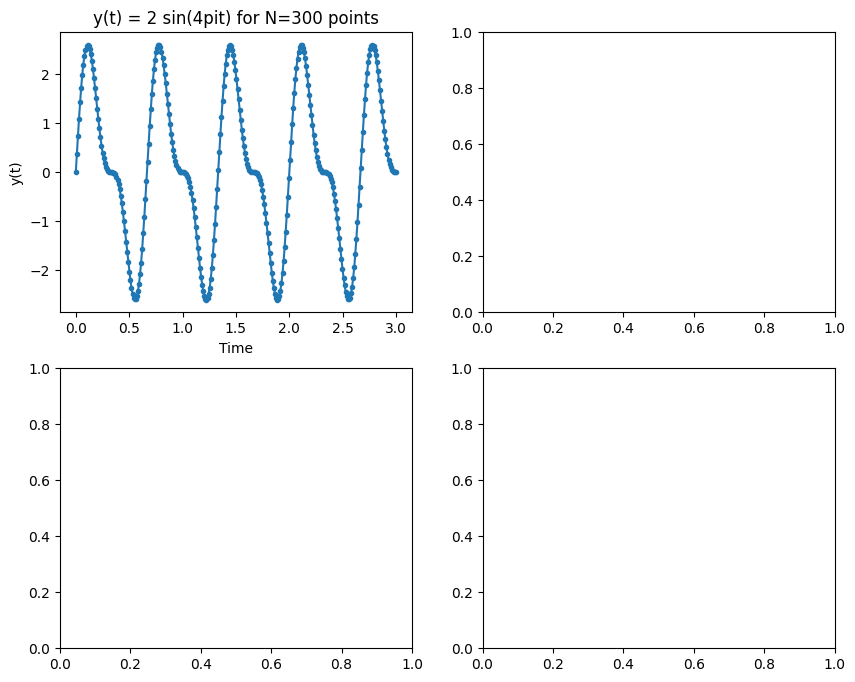

In [3]:
def plot_sine_wave(N, ax):
    t = np.linspace(0, 3, N)
    y = 2 * np.sin(3 * np.pi * t) + np.sin(6 * np.pi * t) 
    
    ax.plot(t, y, 'o-', markersize=3)
    ax.set_title(f"y(t) = 2 sin(4pit) for N={N} points")
    ax.set_xlabel("Time")
    ax.set_ylabel("y(t)")

fig, axes = plt.subplots(2,2,figsize=(10,8))

plot_sine_wave(300,axes[0,0])

plt.show()

In [2]:
import scipy.integrate as integrate


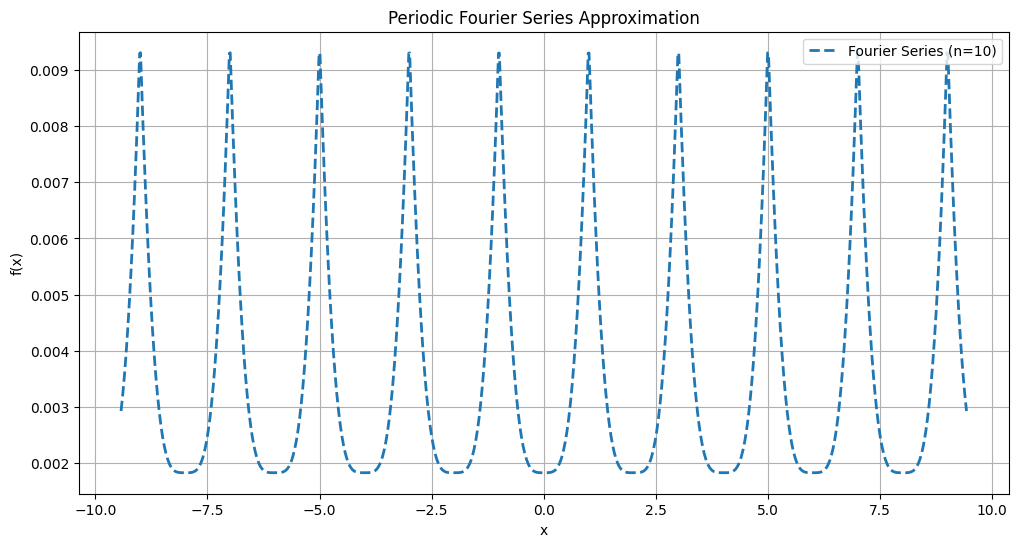

In [20]:
def f(x):
    return x**2

def compute_fourier_series(a,b,f,n):
    x = np.linspace(a,b,1000)
    L = b - a

    a0_integrand = lambda x: f(x)
    a0 = (2 / L) * integrate.quad(a0_integrand, a, b)[0]

    fs = a0 / 2

    for i in range(1, n+1):
        an_integrand = lambda x: f(x) * np.cos((2 * i *np.pi * x)/L)
        bn_integrand = lambda x : f(x) * np.sin((2* i *np.pi * x)/L)
        an = (2 / L) * integrate.quad(an_integrand, a, b)[0] 
        bn = (2 / L) * integrate.quad(bn_integrand, a, b)[0]
        
        fs += an * np.cos((2 * i * np.pi * x) / L) + bn * np.sin((2 * i * np.pi * x) / L)
    return x, fs


a = 1
b = -1
n = 10
x, fourier_series = compute_fourier_series(a,b,f,n)

def periodic_extension(x, fourier_series, a, b):
    L = b - a
    x_extended = np.mod(x - a, L) + a  # Wrap x into the interval [a, b]
    return np.interp(x_extended, x, fourier_series)  # Interpolate Fourier series values

# Create an extended x-axis for periodic plotting
x_extended = np.linspace(-3 * np.pi, 3 * np.pi, 1000)  # Extend beyond [a, b]
fourier_series_extended = periodic_extension(x_extended, fourier_series, a, b)

# Plot the original function and the periodic Fourier series approximation
plt.figure(figsize=(12, 6))
#plt.plot(x_extended, f(x_extended), label='Original Function: $f(x) = x^2$', linewidth=2)
plt.plot(x_extended, fourier_series_extended, label=f'Fourier Series (n={n})', linestyle='--', linewidth=2)
plt.title('Periodic Fourier Series Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()